In [1]:
from app import create_app, db
from app.instrument import Instrument
from app.analysis import Quote
mappings= {'BRK.B': 'BRK-B'}
with create_app().app_context():
    instruments = {b.symbol if b.symbol not in mappings else mappings[b.symbol]:
                   b for b in Instrument.find_stocks(200)}
    quote = Quote([*instruments.keys()], 120)
    quote.update_boosts(21, instruments)
    db.session.commit()
f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}'

'from 2019-02-25 to 2019-06-21 - 200'

In [6]:
stat = quote.statistics(21)
stat = stat[(stat['drawdown'] < 8) & (stat['21-mean'] > 0.8) & (stat['21-shrp'] > 0.8)]
stat

,21-len,21-mean,21-std,21-shrp,drawdown
Symbols,,,,,
PEP,62,4.219495,1.702828,2.380058,2.206724
KO,62,3.925656,1.653503,2.273348,3.383609
MCD,62,3.517417,1.484106,2.257757,2.999196
MA,62,4.373865,1.986382,2.118020,5.698715
WM,62,3.976322,2.068442,1.841800,3.316666
SHOP,62,15.249269,8.838574,1.706452,6.171438
SBUX,62,4.505872,2.857253,1.518663,4.600183
V,62,3.602156,2.406417,1.427637,4.317938
PYPL,62,4.741584,3.352832,1.364493,7.332929


In [20]:
quote.setup_mask(stat.index)
quote.least_correlated_portfolio(21, 2, sr=2)

['PEP'] -3.3187711497216297 1 0.4413447988943503 2.3800579743079897
['PEP', 'KO'] -3.5271680297653676 0.5672048905946383 0.5590333297884935 2.32670312507425
['PEP', 'MCD'] -3.5519433256609965 0.5652791621276787 0.5205920300631828 2.318907258925929
['KO', 'MCD'] -3.739513569614577 0.15331068881247512 0.6382805609573261 2.265552409692189


['KO', 'MCD']

In [13]:
quote.setup_mask(stat.index)
quote.least_correlated_portfolio(21, 4, ['KO', 'MCD'], sr=0)

['KO', 'MCD'] 0.7915912497698012 0.15331068881247512 0.6382805609573261 2.265552409692189
['KO', 'MCD', 'PEP'] 0.6012335541145981 0.42859824717826395 0.5726353069363341 2.303720931230789
['KO', 'MCD', 'PEP', 'MA'] 0.3896769480952266 0.4752647003283513 0.7144122477668754 2.2572957429214444
['KO', 'MCD', 'PEP', 'WM'] 0.17315466452631584 0.37784486001636647 0.5953098045099494 2.1882406871239355
['KO', 'MCD', 'PEP', 'SHOP'] 0.1140018156453396 0.1759534215566235 0.7380483940887161 2.154403715654764
['KO', 'MCD', 'PEP', 'ENPH'] -0.034149378914528294 0.0278635306472923 0.7379870904381794 2.0647972930171505
['KO', 'MCD', 'ENPH', 'COST'] -0.04789759548572553 -0.0826062853447556 0.8347086898590301 1.704042439155351


['KO', 'MCD', 'ENPH', 'COST']

In [15]:
quote.setup_mask(['KO', 'MCD'])
quote.find_optimal_ratio(21, 4)

     fun: 1.405424160885521
     jac: array([2.82369241, 2.80078834])
 message: 'Optimization terminated successfully.'
    nfev: 8
     nit: 2
    njev: 2
  status: 0
 success: True
       x: array([0.439224, 0.560776])


/Users/chaoyi/.local/share/virtualenvs/portfolio_analysis-bdMx2S3t/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


({'KO': 0.4392239971439615, 'MCD': 0.5607760028560385}, 3.6967, 1.1855)

Populating the interactive namespace from numpy and matplotlib


,count,mean,std,min,25%,50%,75%,max,shrp,drawdown
Portfolio,62.0,3.692969,1.184443,-0.139729,3.012735,3.824990,4.472466,5.781434,2.977182,2.025419
KO,62.0,3.925656,1.653503,0.387284,2.890540,3.874527,4.693330,8.396620,2.273348,3.383609
MCD,62.0,3.517417,1.484106,-0.558029,2.811135,3.754690,4.320519,6.412885,2.257757,2.999196


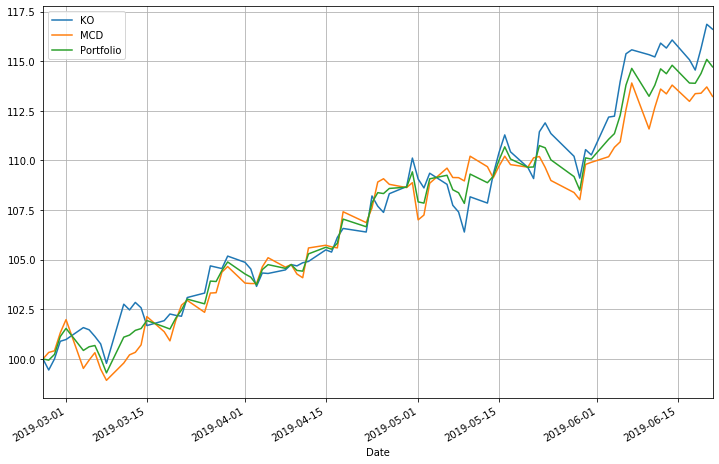

In [16]:
%pylab inline
quote.graph(21, {'MCD': 0.56, 'KO': 0.44})